<a href="https://colab.research.google.com/github/sathasivamn/Neural-Networks/blob/main/Assignment_18_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

### 1: Data Exploration & Preprocessing
### 2: Build and Train Basic ANN
### 3: Hyperparameter Tuning (Grid Search)
### 4: Evaluate Tuned Model
### 5: Plotting Training History
### 6: Final Notes for Report

# 1: Data Exploration & Preprocessing
### - Import libraries
### - Load Dataset
### - Explore Dataset
### - Data Preprocessing
##### - Encode labels
##### - One-hot encoder
##### - Normalize features
##### - Train-Test split


In [1]:
# Force remove numpy and tensorflow
!pip uninstall -y numpy scikit-learn tensorflow

# Install stable compatible versions
!pip install numpy==1.23.5 scikit-learn==1.2.2 tensorflow==2.12.0

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [26]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
# Load Dataset
df = pd.read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [28]:
# Explore Dataset
print("Shape of dataset:", df.shape)
print("\nInfo:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df.iloc[:, -1].value_counts())

Shape of dataset: (20000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB

Info:
 None

Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0

In [6]:
# Data Preprocessing
# Assume last column is the label
X = df.iloc[:, :-1] # Keep X as a DataFrame
y = df.iloc[:, -1].values

In [7]:
# Encode labels (e.g., A, B, C → 0, 1, 2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
# One-hot encode categorical features in X
categorical_features = X.select_dtypes(include=['object']).columns # Identify categorical features in X
X = pd.get_dummies(X, columns=categorical_features) # Convert specified categorical columns to numerical

In [9]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2: Build and Train Basic ANN
### - Build ANN Model
### - Train Basic ANN
### - Evaluate Basic Model

In [11]:
# Build ANN Model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer for classification
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [12]:
# Train Basic ANN
basic_model = create_model()
history = basic_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/30
450/450 [==============================] - 2s 2ms/step - loss: 1.5308 - accuracy: 0.4585 - val_loss: 1.2719 - val_accuracy: 0.5131
Epoch 2/30
450/450 [==============================] - 1s 2ms/step - loss: 1.1802 - accuracy: 0.5444 - val_loss: 1.1181 - val_accuracy: 0.5669
Epoch 3/30
450/450 [==============================] - 1s 3ms/step - loss: 1.0744 - accuracy: 0.5803 - val_loss: 1.0440 - val_accuracy: 0.5950
Epoch 4/30
450/450 [==============================] - 1s 3ms/step - loss: 1.0079 - accuracy: 0.6019 - val_loss: 1.0028 - val_accuracy: 0.6000
Epoch 5/30
450/450 [==============================] - 1s 2ms/step - loss: 0.9652 - accuracy: 0.6194 - val_loss: 0.9627 - val_accuracy: 0.6319
Epoch 6/30
450/450 [==============================] - 1s 2ms/step - loss: 0.9257 - accuracy: 0.6322 - val_loss: 0.9380 - val_accuracy: 0.6388
Epoch 7/30
450/450 [==============================] - 1s 2ms/step - loss: 0.8965 - accuracy: 0.6440 - val_loss: 0.9005 - val_accuracy: 0.6438
Epoch 

In [13]:
# Evaluate Basic Model
y_pred = np.argmax(basic_model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

125/125 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      0.50      0.36         4
           2       0.00      0.00      0.00         6
           3       0.71      0.32      0.44        31
           4       0.59      0.54      0.56        94
           5       0.56      0.48      0.52       196
           6       0.59      0.61      0.60       353
           7       0.68      0.52      0.59       712
           8       0.77      0.87      0.82      1596
           9       0.54      0.55      0.54       485
          10       0.51      0.64      0.57       308
          11       0.70      0.45      0.54       175
          12       0.75      0.10      0.18        29
          13       0.43      0.33      0.38         9
          14       0.00      0.00      0.00         1

    accuracy                           0.67      4000
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3: Hyperparameter Tuning (Grid Search)
### - Function to create the Keras model
### - Wrap Keras model for scikit-learn
### - Define grid of hyperparameters
### - Grid Search
### - Output Best Parameters

In [17]:
# Function to create the Keras model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer for classification
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [18]:
# Wrap Keras model for scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-18-911075619d32>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [19]:
# Define grid of hyperparameters
param_grid = {
    'batch_size': [16, 32],
    'epochs': [30, 50],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh']
}

In [20]:
# Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

In [21]:
# Output Best Parameters
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'optimizer': 'adam'}
Best Accuracy:  0.6803131103515625


# 4: Evaluate Tuned Model
### - Evaluate Tuned Model
### - Predict probabilities for each class

In [23]:
# Evaluate Tuned Model
best_model = grid_result.best_estimator_

# Predict probabilities for each class
y_pred_probs = best_model.predict(X_test)

# If binary classification (output is 1D), use a threshold to get class labels
# Otherwise (multi-class, output is 2D), use argmax

if y_pred_probs.ndim == 1:  # Check if output is 1-dimensional
    y_pred_best = (y_pred_probs > 0.5).astype(int) # Assuming 0.5 as threshold for binary classification
else:
    y_pred_best = np.argmax(y_pred_probs, axis=1)

print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("Tuned Model Accuracy Score:", accuracy_score(y_test, y_pred_best))

125/125 [==============================] - 0s 1ms/step
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      1.00      0.00         4
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00       196
           6       0.00      0.00      0.00       353
           7       0.00      0.00      0.00       712
           8       0.00      0.00      0.00      1596
           9       0.00      0.00      0.00       485
          10       0.00      0.00      0.00       308
          11       0.00      0.00      0.00       175
          12       0.00      0.00      0.00        29
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1

    accuracy                           0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5: Plotting Training History (Optional)
### - Plot accuracy and loss

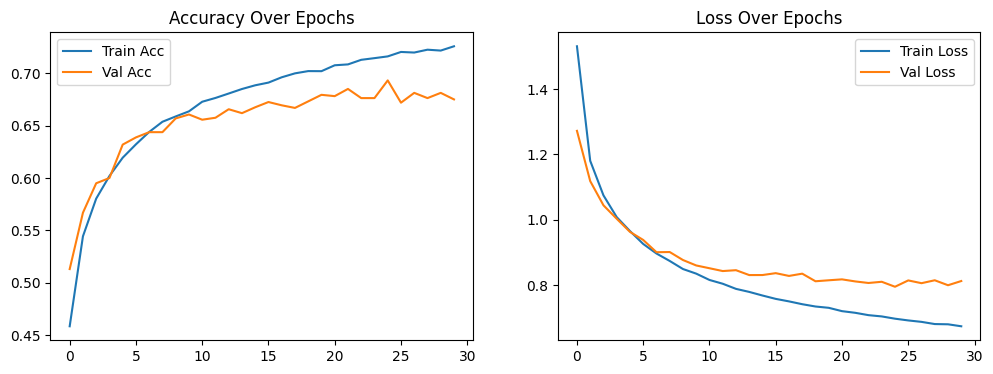

In [24]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()

# 6: Final Notes for Report:

#### - Accuracy Improvement: Compare before and after tuning.
#### - Model Changes: Discuss impact of optimizers, activation functions.
#### - Hyperparameter Strategy: GridSearchCV ensured systematic testing.
#### - Evaluation Metrics: Accuracy, precision, recall, F1-score were used for robust evaluation.